# Cancer Data Analysis

---------------------------------------------------------------------------------------------------------------------------

### Import required libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [20]:
pwd

'C:\\Users\\gohil\\Desktop\\GOAL\\FINGERTIPS\\4. MACHINE LEARNING\\PROJECTS\\Python Project 10 Clustering - Cancer_Data_Analysis'

### Load the data

In [21]:
df = pd.read_csv("Cancer_Data_Analysis.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
df.shape

(569, 32)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [25]:
df.drop("id", axis=1, inplace=True)

In [26]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [27]:
df1 = df.drop(["diagnosis"], axis = 1)
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


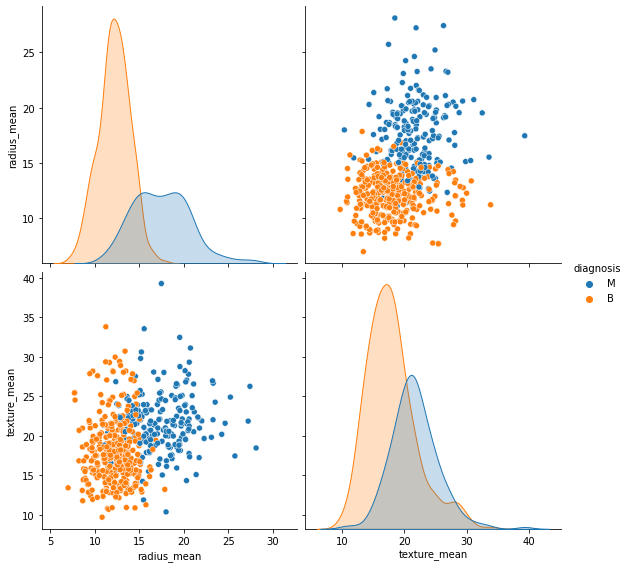

In [28]:
# Create pair plot between two column radius_mean and radius_mean by diagnosis
sns.pairplot(df[["radius_mean","texture_mean","diagnosis"]], hue="diagnosis", height=4)
plt.show()

In [29]:
# Select only two feature radius_mean & texture_mean for clustering in new dataset
new_dataset = df[["radius_mean","texture_mean"]]
new_dataset.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [30]:
# Apply scaling on new dataset
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()
new_dataset = standardscaler.fit_transform(new_dataset)
new_dataset

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       ...,
       [ 0.70228425,  2.0455738 ],
       [ 1.83834103,  2.33645719],
       [-1.80840125,  1.22179204]])

In [31]:
new_dataset = pd.DataFrame(new_dataset, columns=['radius_mean','texture_mean'])
new_dataset

,radius_mean,texture_mean
0,1.097064,-2.073335
1,1.829821,-0.353632
2,1.579888,0.456187
3,-0.768909,0.253732
4,1.750297,-1.151816
...,...,...
564,2.110995,0.721473
565,1.704854,2.085134
566,0.702284,2.045574
567,1.838341,2.336457


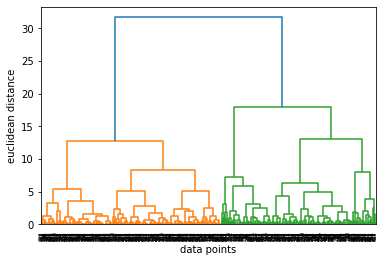

<Figure size 1440x1440 with 0 Axes>

In [35]:
# Display hierarchical clustering as a dendrogram using scipy
from scipy.cluster.hierarchy import linkage,dendrogram
merge = linkage(new_dataset, method="ward")

dendrogram(merge, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [36]:
# Apply Agglomerative Clustering on dataset with 2 n number of clusters
from sklearn.cluster import AgglomerativeClustering

In [38]:
# Predict the cluster and create new column for cluster label data
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(new_dataset)

In [40]:
new_dataset["label"] = cluster
new_dataset.head()

,radius_mean,texture_mean,label
0,1.097064,-2.073335,1
1,1.829821,-0.353632,0
2,1.579888,0.456187,0
3,-0.768909,0.253732,1
4,1.750297,-1.151816,0


In [41]:
# Check count of label
new_dataset["label"].value_counts()

1    306
0    263
Name: label, dtype: int64

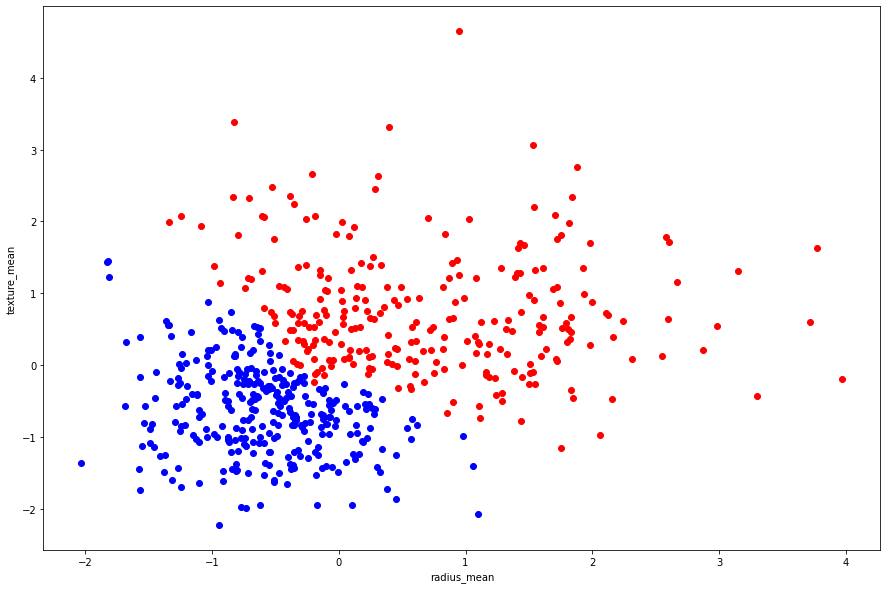

In [42]:
# Plot the label data
plt.figure(figsize = (15, 10))
plt.scatter(new_dataset["radius_mean"][new_dataset.label == 0], new_dataset["texture_mean"][new_dataset.label == 0], color = "red")
plt.scatter(new_dataset["radius_mean"][new_dataset.label == 1], new_dataset["texture_mean"][new_dataset.label == 1], color = "blue")

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

In [43]:
# Check the silhouette score
from sklearn.metrics import silhouette_score

score_agg = silhouette_score(new_dataset, cluster)
score_agg

0.4717861439453535

In [46]:
new_data_k = df.loc[:,['radius_mean','texture_mean']]
new_data_k.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [47]:
# Now apply kmeans clustering no dataset with 2 number of clusters
from sklearn.cluster import KMeans

cls = KMeans(n_clusters = 2)
cls.fit(new_data_k)

KMeans(n_clusters=2)

In [48]:
# Check wcss score
wcss = cls.inertia_
wcss

9403.76824064772

In [49]:
# Try different N number from 1 to 10 and plot the result of wcss score

#create empty list
wcss = []

#select k value from 1 to 10
for i in range(1, 11):
    cls = KMeans(n_clusters = i, random_state = 42)
    cls.fit(new_data_k)
    # inertia method returns wcss for that model
    wcss.append(cls.inertia_)

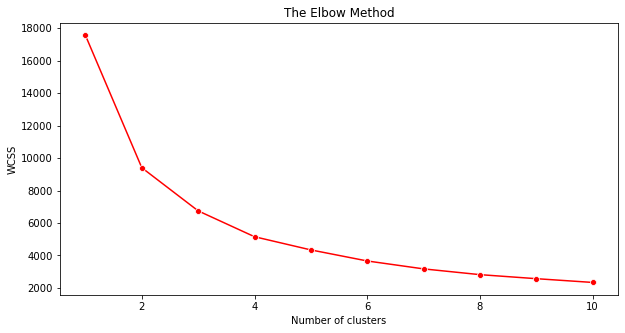

In [50]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
# Apply kmeans again with different no. of cluster according to best wcss score.

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(new_data_k)

In [52]:
# Create column for label cluster
new_data_k["label"] = y_kmeans
new_data_k.head()

,radius_mean,texture_mean,label
0,17.99,10.38,0
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,3
4,20.29,14.34,1
